### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

RMSE: 44.45


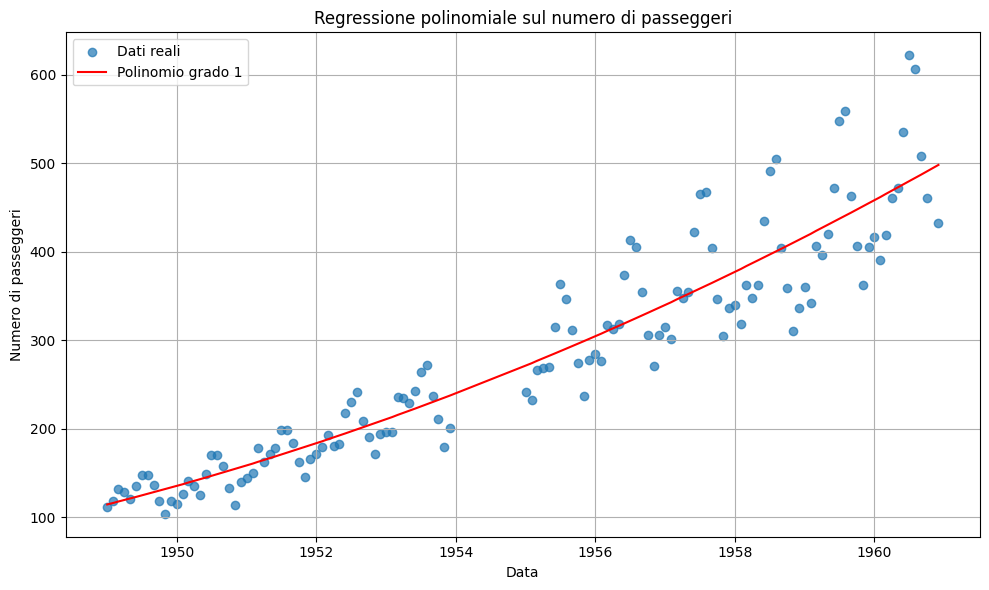

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

# 2. Crea 'mese_numerico' a partire da gennaio 1949
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')
start_date = pd.to_datetime('1949-01')
df['mese_numerico'] = ((df['date'].dt.year - start_date.year) * 12 +
                       df['date'].dt.month - 1)

df.dropna(subset= ['mese_numerico', 'passengers'], inplace=True)

x = df['mese_numerico'].values
y = df['passengers'].values

coeffs = np.poly1d(np.polyfit(x, y, 2))
y_pred = coeffs(x)

# 4. Calcolo RMSE
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
print(f"RMSE: {rmse:.2f}")

# 5. 
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], y, label='Dati reali', alpha=0.7)
plt.plot(df['date'], y_pred, color='red', label=f'Polinomio grado {grado}')
plt.title('Regressione polinomiale sul numero di passeggeri')
plt.xlabel('Data')
plt.ylabel('Numero di passeggeri')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [17]:
import dash
from dash import dcc, html, Output, Input
import plotly.graph_objs as go
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Genera i dati
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = X**3 - X + np.random.normal(0, 3, size=X.shape)  # y = x^3 - x + rumore

# Inizializza l'app Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("Regressione Polinomiale interattiva"),
    dcc.Slider(
        id='degree-slider',
        min=1,
        max=10,
        step=1,
        value=3,
        marks={i: str(i) for i in range(1, 11)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    dcc.Graph(id='poly-regression-plot')
])

@app.callback(
    Output('poly-regression-plot', 'figure'),
    Input('degree-slider', 'value')
)
def update_graph(degree):
    # Trasforma X in matrice colonna
    X_reshaped = X.reshape(-1, 1)
    
    # Crea caratteristiche polinomiali
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_reshaped)
    
    # Regressione lineare
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    # Grafico dati reali e modello
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X, y=y, mode='markers', name='Dati reali'))
    fig.add_trace(go.Scatter(x=X, y=y_pred, mode='lines', name=f'Regressione polinomiale grado {degree}'))
    fig.update_layout(
        title="Regressione Polinomiale",
        xaxis_title="x",
        yaxis_title="y",
        template="plotly_white"
    )
    return fig

if __name__ == '__main__':
   app.run(debug=True)
